# The Neural Network
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
>Neural networks comprise of layers/modules that perform operations on data.

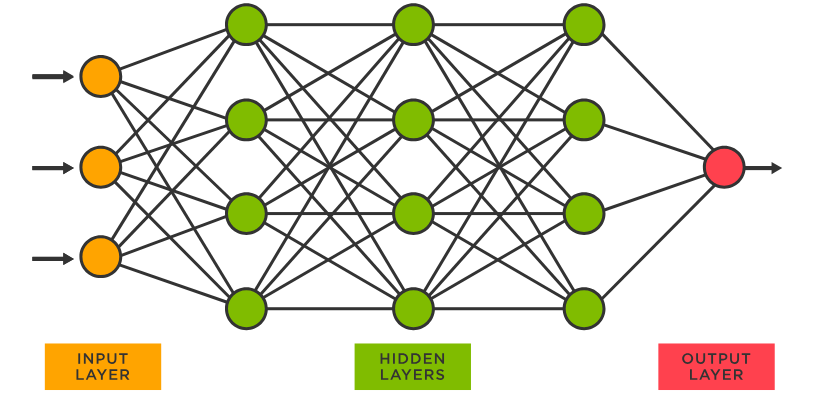


## torch.nn 
>***torch.nn***  provides all the building blocks you need to build your own neural network. 

>Every module in PyTorch subclasses the nn.Module.

In [1]:
import torch
import torch.nn as nn

In [8]:
# 28*28 image 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512), # 28 * 28 = 784
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.sequential(x)
        return logits

# Model Layers

## 1- nn.Flatten
> is used to flatten the input, which is typically a 2D image (28x28) into a 1D tensor (a vector) with 784 elements.

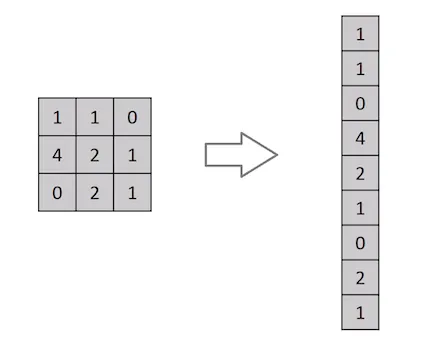

Flattening of a 3x3 image matrix into a 9x1 vector


In [12]:
# 3 images of size 28x28
input_image = torch.rand(3,28,28)
print(input_image,input_image.shape)
print('-'*70)
flatten = nn.Flatten()
flat_image = flatten(input_image)
print("flat image:\n",flat_image,flat_image.shape)

tensor([[[0.3989, 0.9419, 0.5040,  ..., 0.0738, 0.8093, 0.7578],
         [0.7556, 0.9962, 0.2976,  ..., 0.8148, 0.0366, 0.7875],
         [0.1079, 0.7850, 0.4205,  ..., 0.1107, 0.4186, 0.4663],
         ...,
         [0.2220, 0.9240, 0.3433,  ..., 0.8727, 0.2678, 0.2256],
         [0.9480, 0.8072, 0.2695,  ..., 0.3057, 0.2821, 0.7292],
         [0.8017, 0.9129, 0.7481,  ..., 0.2166, 0.3708, 0.7666]],

        [[0.2523, 0.3549, 0.6137,  ..., 0.0813, 0.6816, 0.1549],
         [0.0894, 0.2606, 0.8200,  ..., 0.9139, 0.0646, 0.0077],
         [0.1118, 0.6582, 0.2226,  ..., 0.2692, 0.4064, 0.2619],
         ...,
         [0.9409, 0.0045, 0.2331,  ..., 0.3007, 0.5477, 0.1903],
         [0.9402, 0.5928, 0.3987,  ..., 0.0445, 0.4784, 0.8586],
         [0.4180, 0.5862, 0.1589,  ..., 0.3150, 0.4894, 0.3604]],

        [[0.8229, 0.9022, 0.9322,  ..., 0.3034, 0.7275, 0.7938],
         [0.0522, 0.6710, 0.3181,  ..., 0.6022, 0.1492, 0.9694],
         [0.1420, 0.5115, 0.3503,  ..., 0.6372, 0.8353, 0.

## 2- nn.Linear
>The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.



In [9]:
# using linear transformation to reduce 784 dimensions (pixel) to 20
linear = nn.Linear(in_features=784, out_features=20)

linear_output = linear(flat_image)
print(linear_output,linear_output.size())

tensor([[-0.2073,  0.0913,  0.2174,  0.2635, -0.3819, -0.0804,  0.3272, -0.4790,
         -0.1332,  0.0832, -0.3101, -0.1997, -0.0587, -0.3863, -0.2238, -0.2984,
         -0.5306, -0.0919, -0.0710, -0.0530],
        [-0.2485,  0.0012,  0.3955,  0.3140, -0.9589,  0.0573,  0.2570, -0.1551,
         -0.1113, -0.1414, -0.2147, -0.4668, -0.0601, -0.4094, -0.1769, -0.5175,
         -0.5321, -0.2451, -0.3289,  0.0923],
        [-0.1492,  0.1333,  0.3120,  0.3920, -0.4988, -0.1411,  0.3682, -0.2386,
         -0.1091, -0.0151, -0.5559, -0.1940,  0.2350, -0.0389,  0.1963, -0.3618,
         -0.5996, -0.4893, -0.3773,  0.1945]], grad_fn=<AddmmBackward0>) torch.Size([3, 20])


## 3- nn.ReLU

    ReLU is the best activation function for deep learning.
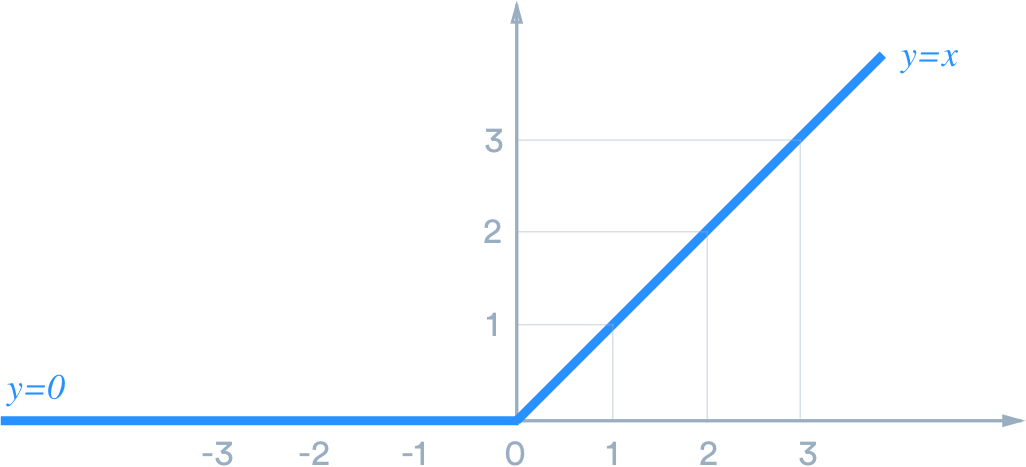!

In [13]:
relu = nn.ReLU()
relu_output = relu(linear_output)
print(relu_output,relu_output.size())

tensor([[0.0000, 0.0913, 0.2174, 0.2635, 0.0000, 0.0000, 0.3272, 0.0000, 0.0000,
         0.0832, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0012, 0.3955, 0.3140, 0.0000, 0.0573, 0.2570, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0923],
        [0.0000, 0.1333, 0.3120, 0.3920, 0.0000, 0.0000, 0.3682, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.2350, 0.0000, 0.1963, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1945]], grad_fn=<ReluBackward0>) torch.Size([3, 20])


In [14]:
linear2 = nn.Linear(in_features=20, out_features=10)
logits = linear2(relu_output)
print(logits,logits.shape)

tensor([[ 0.0259, -0.1869, -0.1124,  0.0552,  0.0615,  0.1720,  0.0184,  0.1325,
         -0.1619,  0.0238],
        [-0.0532, -0.1407, -0.0437,  0.0714,  0.0803,  0.1942,  0.0206,  0.1445,
         -0.1940, -0.0059],
        [-0.0490, -0.1445, -0.0100, -0.0020,  0.0679,  0.1499,  0.0588,  0.1341,
         -0.1820, -0.0322]], grad_fn=<AddmmBackward0>) torch.Size([3, 10])


---
#### The last linear layer of the neural network returns logits - raw values in [-infty, infty] 
---

## 4- nn.Softmax
    Softmax is an activation function that scales numbers/logits into probabilities.
>The logits are passed to the nn.Softmax module and are scaled to values [0, 1] representing the model’s predicted probabilities for each class.

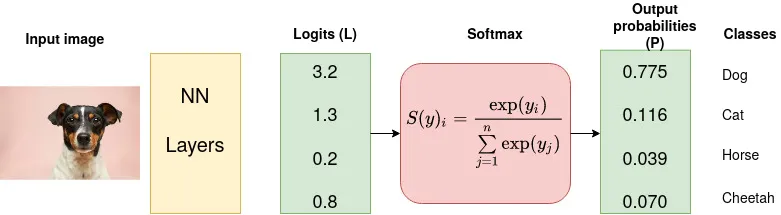

In [96]:
#probabilities for each class
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1195, 0.0961, 0.0847, 0.0904, 0.0794, 0.1354, 0.0934, 0.0925, 0.1124,
         0.0963],
        [0.1246, 0.0920, 0.0914, 0.0924, 0.0765, 0.1251, 0.0934, 0.0913, 0.1199,
         0.0933],
        [0.1236, 0.1054, 0.0751, 0.1031, 0.0788, 0.1288, 0.0955, 0.0928, 0.1128,
         0.0842]], grad_fn=<SoftmaxBackward0>)

## 5- nn.Sequential
> nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. 
You can use sequential containers to put together a quick network 

In [100]:
input_image = torch.rand(3,28,28)
seq_modules = nn.Sequential(
    nn.Flatten() # convert each 2D 28x28 image into a contiguous array of 784 pixel values
    , nn.Linear(in_features=28*28, out_features=20) 
    , nn.ReLU() # Non-linear activations
    , nn.Linear(20, 10) # logits
    , nn.Softmax(dim=1) # probability
)

In [103]:
print(seq_modules)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=20, bias=True)
  (2): ReLU()
  (3): Linear(in_features=20, out_features=10, bias=True)
  (4): Softmax(dim=1)
)


In [101]:
pred_probab = seq_modules(input_image)
pred_probab

tensor([[0.0794, 0.0835, 0.0913, 0.0961, 0.1068, 0.1086, 0.1508, 0.1011, 0.0866,
         0.0958],
        [0.0813, 0.0946, 0.0940, 0.1080, 0.1187, 0.1051, 0.1419, 0.0956, 0.0787,
         0.0821],
        [0.0832, 0.0822, 0.0962, 0.1029, 0.1080, 0.1063, 0.1464, 0.1038, 0.0843,
         0.0868]], grad_fn=<SoftmaxBackward0>)

## Model Parameters
> Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() method.

In [106]:
for name, param in seq_modules.named_parameters():
    print(f"Layer: {name} | Values : {param[:2]} | Size: {param.size()} \n")

Layer: 1.weight | Values : tensor([[-0.0178,  0.0257,  0.0330,  ..., -0.0151,  0.0197, -0.0242],
        [-0.0292,  0.0027,  0.0087,  ..., -0.0209,  0.0020,  0.0301]],
       grad_fn=<SliceBackward0>) | Size: torch.Size([20, 784]) 

Layer: 1.bias | Values : tensor([-0.0329, -0.0243], grad_fn=<SliceBackward0>) | Size: torch.Size([20]) 

Layer: 3.weight | Values : tensor([[-0.0465,  0.1057, -0.0366,  0.0162, -0.1025,  0.1670, -0.0641,  0.0829,
          0.0358,  0.1928,  0.0677,  0.1512, -0.1947, -0.1013,  0.0608, -0.0135,
          0.1860, -0.0003, -0.1196, -0.1001],
        [-0.1239,  0.1725, -0.1009,  0.1109,  0.1182, -0.0624,  0.1809, -0.2014,
          0.0667, -0.2145,  0.0114,  0.0435, -0.0192, -0.1211, -0.0719, -0.0113,
         -0.1357,  0.0657, -0.0551, -0.1206]], grad_fn=<SliceBackward0>) | Size: torch.Size([10, 20]) 

Layer: 3.bias | Values : tensor([-0.0481, -0.0716], grad_fn=<SliceBackward0>) | Size: torch.Size([10]) 



## Define a Neural Network Class
    torch.nn.Module 
1-def \__init__()
>We define our neural network by subclassing nn.Module, and initialize the neural network layers in \__init__.

2-def forward()
>Every nn.Module subclass implements the operations on input data in the ***forward*** method.

In [46]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
    
        super().__init__() # inherits from nn.Module
        
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        return self.linear(x)

#### create an instance of NeuralNetwork, and move it to the device, and print its structure.



In [47]:
model = LinearRegression(4,4)
model

LinearRegression(
  (linear): Linear(in_features=4, out_features=4, bias=True)
)

In [48]:
Y = torch.tensor([2],dtype=torch.float32)
x = torch.tensor([1],dtype=torch.float32)
x.shape

torch.Size([1])

In [49]:
model = LinearRegression(1,1)
model(x)

tensor([-1.1907], grad_fn=<ViewBackward0>)

In [50]:
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
x = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
x.shape

torch.Size([4, 1])

In [51]:
model = LinearRegression(1,1)

for val in x:
    print(val,model(val))

tensor([1.]) tensor([-1.4355], grad_fn=<ViewBackward0>)
tensor([2.]) tensor([-1.9661], grad_fn=<ViewBackward0>)
tensor([3.]) tensor([-2.4968], grad_fn=<ViewBackward0>)
tensor([4.]) tensor([-3.0274], grad_fn=<ViewBackward0>)


In [52]:
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)
x = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)

n_sample,n_features = x.shape
# 4 , 1
input_size = n_features
output_size = n_features
 

model = LinearRegression(input_size,output_size)
 
weights= model.parameters()
learning_rate = 0.1
optimizer=torch.optim.SGD(weights,lr=learning_rate)
loss=nn.MSELoss()
n_iters = 401

for epoch in range(n_iters):
#     predictions (forward pass)
    y_pred=model(x)
#     loss
    l =loss(Y,y_pred)
#     grditents
    l.backward()
    if epoch % 50 == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1},predict:{y_pred.detach()[0]}, w:{w[0][0].item():.4f} , grad:{w.grad.item():.4f} , loss:{l:.4f}' )
#     update weights
    optimizer.step()
#     zero gradients
    optimizer.zero_grad()

epoch:1,predict:tensor([-0.6131]), w:-0.5205 , grad:-38.2707 , loss:48.8230
epoch:51,predict:tensor([2.0989]), w:1.9490 , grad:-0.0153 , loss:0.0038
epoch:101,predict:tensor([2.0216]), w:1.9888 , grad:-0.0033 , loss:0.0002
epoch:151,predict:tensor([2.0047]), w:1.9976 , grad:-0.0007 , loss:0.0000
epoch:201,predict:tensor([2.0010]), w:1.9995 , grad:-0.0002 , loss:0.0000
epoch:251,predict:tensor([2.0002]), w:1.9999 , grad:-0.0000 , loss:0.0000
epoch:301,predict:tensor([2.0000]), w:2.0000 , grad:-0.0000 , loss:0.0000
epoch:351,predict:tensor([2.0000]), w:2.0000 , grad:0.0000 , loss:0.0000
epoch:401,predict:tensor([2.0000]), w:2.0000 , grad:0.0000 , loss:0.0000


In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.sequential(x)
        return logits

In [54]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (sequential): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [55]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} \n   Values : {param[:2]} \n")

Layer: sequential.1.weight | Size: torch.Size([512, 784]) 
   Values : tensor([[ 0.0173,  0.0286, -0.0320,  ...,  0.0208,  0.0180, -0.0290],
        [-0.0054,  0.0100, -0.0347,  ...,  0.0163, -0.0099, -0.0333]],
       grad_fn=<SliceBackward0>) 

Layer: sequential.1.bias | Size: torch.Size([512]) 
   Values : tensor([-0.0071, -0.0282], grad_fn=<SliceBackward0>) 

Layer: sequential.3.weight | Size: torch.Size([512, 512]) 
   Values : tensor([[-0.0008, -0.0391, -0.0027,  ..., -0.0301,  0.0123,  0.0088],
        [-0.0400, -0.0246,  0.0413,  ..., -0.0387, -0.0015, -0.0016]],
       grad_fn=<SliceBackward0>) 

Layer: sequential.3.bias | Size: torch.Size([512]) 
   Values : tensor([0.0018, 0.0022], grad_fn=<SliceBackward0>) 

Layer: sequential.5.weight | Size: torch.Size([10, 512]) 
   Values : tensor([[-0.0013, -0.0227,  0.0308,  ...,  0.0187,  0.0411, -0.0027],
        [-0.0073,  0.0003, -0.0145,  ...,  0.0137, -0.0365,  0.0087]],
       grad_fn=<SliceBackward0>) 

Layer: sequential.5.bias